In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 
from openpiv import windef
import openpiv.pyprocess as process
from openpiv import pyprocess
from openpiv import widim
import numpy as np
from time import time
import warnings
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import cv2 # Added for image equalozation
from math import *
import imageio
import os
import copy

folder = '/home/matteo/PIV'
save = 1 # Save images at the end of postProcessing in Images/ImagesCorrected

/home/matteo/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
pixel_depth = 8 # bit
dynamic_range = 2**pixel_depth # levels
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel

In [3]:
# Load saveVectorField functiopon
%run -i '/home/matteo/PIV/Scripts/saveVectorField'
%run -i '/home/matteo/PIV/Scripts/flash_mask'
%run -i '/home/matteo/PIV/Scripts/win_def_image'

In [4]:
#windowsizes = (256,128,64)
windowsizes = (128,64,32)
min_win = 32
overlap = (64, 32, 16)
min_ovlap = 16
starting_folder = folder + '/Images/ImagesCorrected'

Processing image number:001


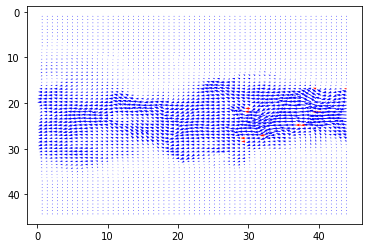

Image Pair 1


In [5]:
win_def_image('001',windowsizes,overlap,starting_folder)
#win_def_image_moretime('001','002',windowsizes,overlap,starting_folder)
Data = np.genfromtxt(folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/exp1_001.txt',
        delimiter='	',
        names=True,
        dtype=None)
u = Data['u']
v = Data['v']
u = u.flatten()
v = v.flatten()

In [6]:
u

array([-4.4492, -3.8465, -4.0566, ..., -1.5217, -2.3616, -0.1473])

In [7]:
# Generate strings for the images
numbers = ["{0:03}".format(i) for i in range(2,101)]

Processing image number:002


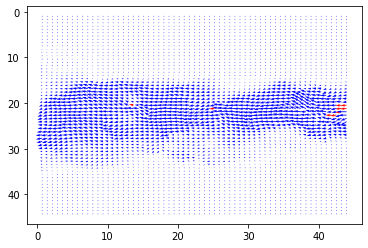

Image Pair 1
Processing image number:003


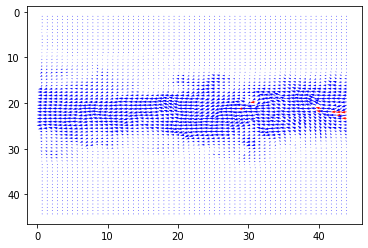

Image Pair 1
Processing image number:004


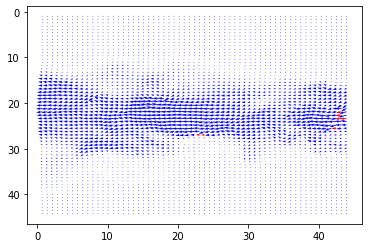

Image Pair 1
Processing image number:005


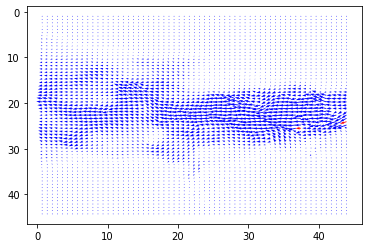

Image Pair 1
Processing image number:006


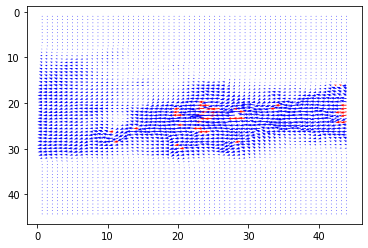

Image Pair 1
Processing image number:007


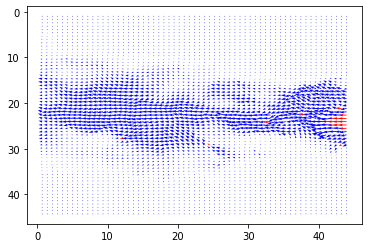

Image Pair 1
Processing image number:008


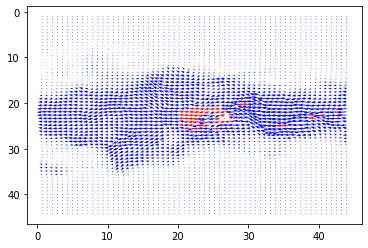

Image Pair 1
Processing image number:009


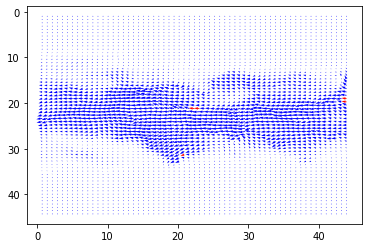

Image Pair 1
Processing image number:010


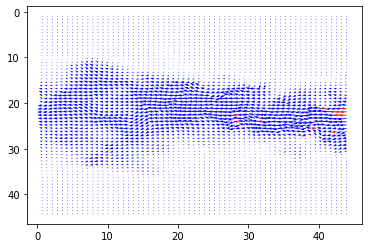

Image Pair 1
Processing image number:011


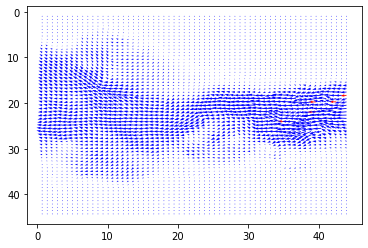

Image Pair 1
Processing image number:012


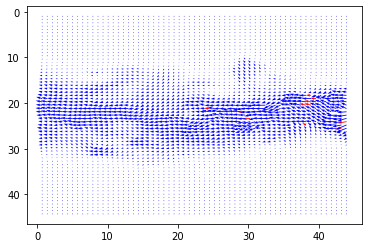

Image Pair 1
Processing image number:013


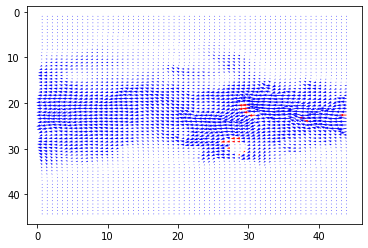

Image Pair 1
Processing image number:014


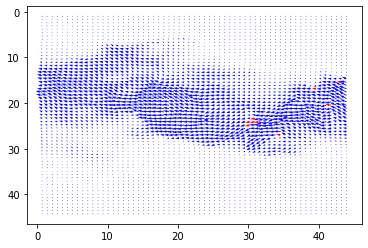

Image Pair 1
Processing image number:015


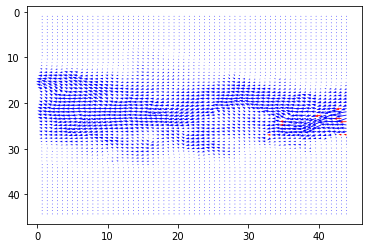

Image Pair 1
Processing image number:016


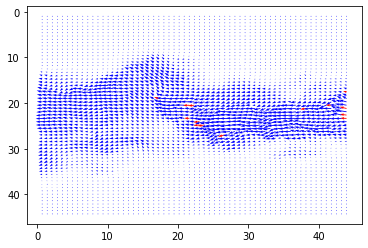

Image Pair 1
Processing image number:017


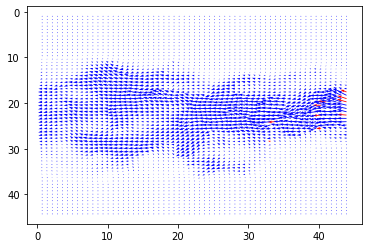

Image Pair 1
Processing image number:018


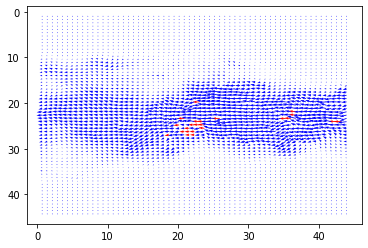

Image Pair 1
Processing image number:019


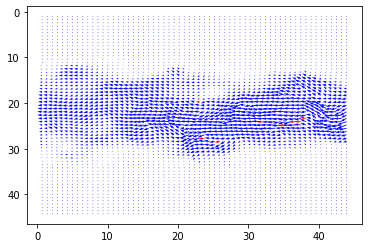

Image Pair 1
Processing image number:020


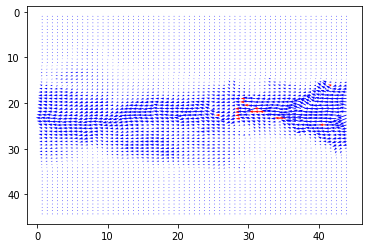

Image Pair 1
Processing image number:021


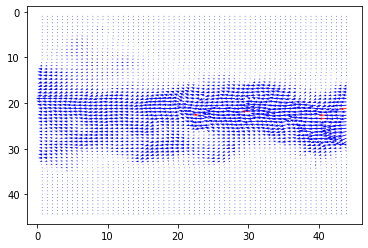

Image Pair 1
Processing image number:022


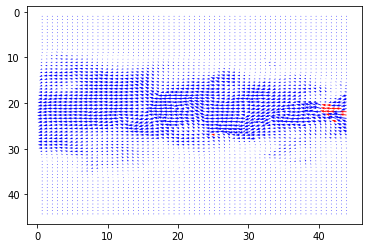

Image Pair 1
Processing image number:023


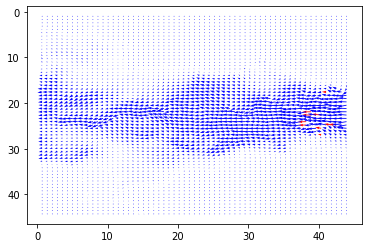

Image Pair 1
Processing image number:024


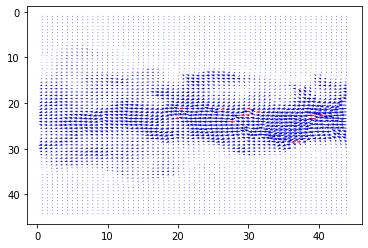

Image Pair 1
Processing image number:025


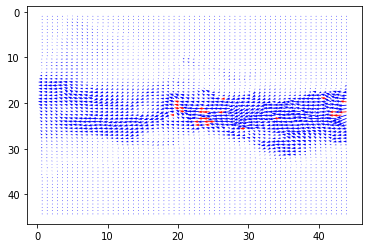

Image Pair 1
Processing image number:026


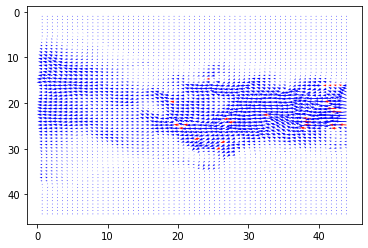

Image Pair 1
Processing image number:027


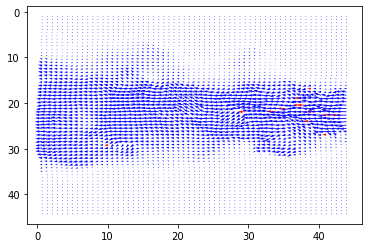

Image Pair 1
Processing image number:028


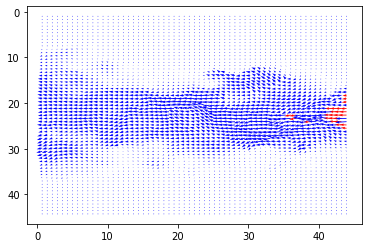

Image Pair 1
Processing image number:029


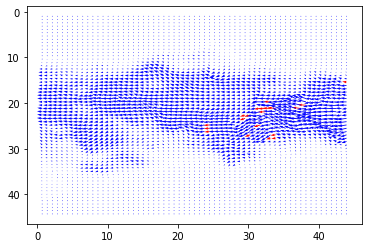

Image Pair 1
Processing image number:030


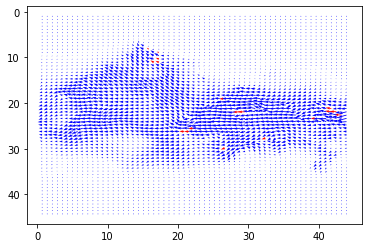

Image Pair 1
Processing image number:031


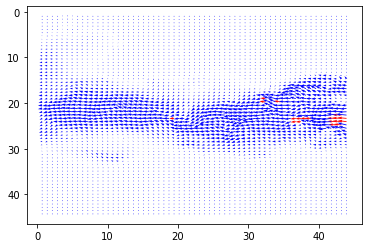

Image Pair 1
Processing image number:032


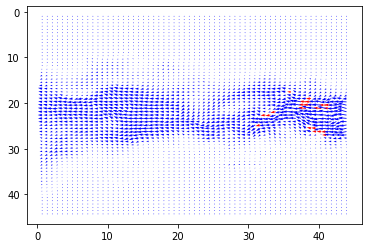

Image Pair 1
Processing image number:033


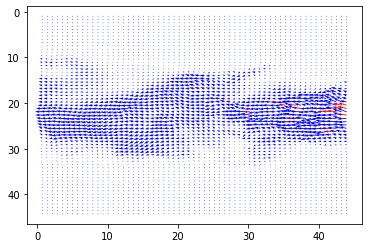

Image Pair 1
Processing image number:034


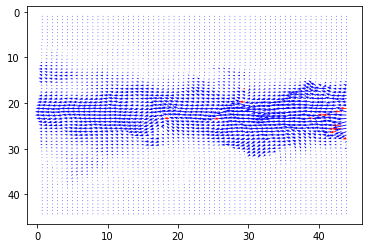

Image Pair 1
Processing image number:035


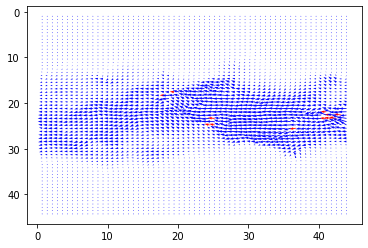

Image Pair 1
Processing image number:036


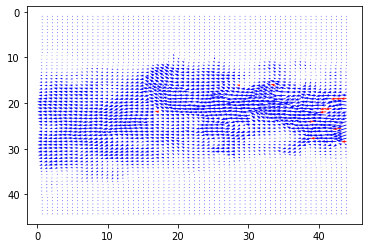

Image Pair 1
Processing image number:037


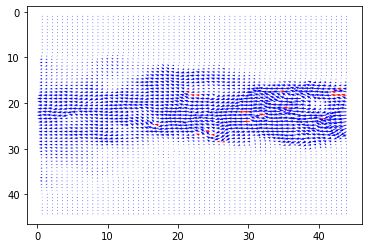

Image Pair 1
Processing image number:038


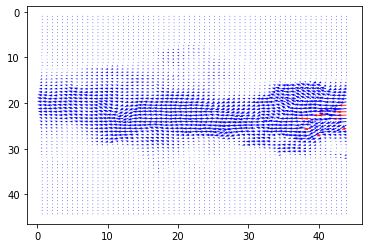

Image Pair 1
Processing image number:039


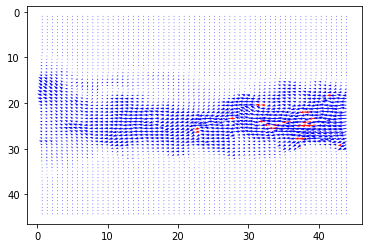

Image Pair 1
Processing image number:040


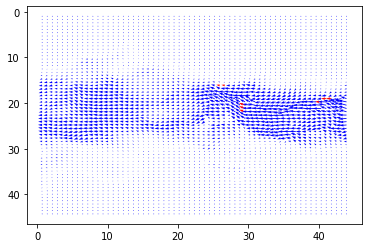

Image Pair 1
Processing image number:041


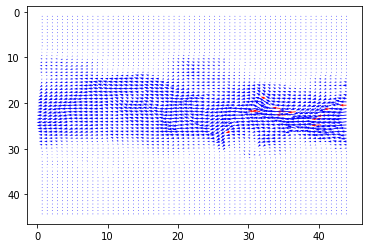

Image Pair 1
Processing image number:042


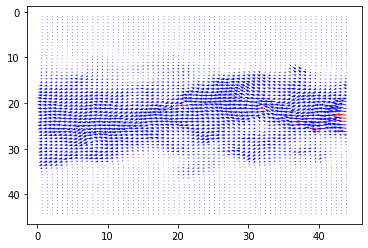

Image Pair 1
Processing image number:043


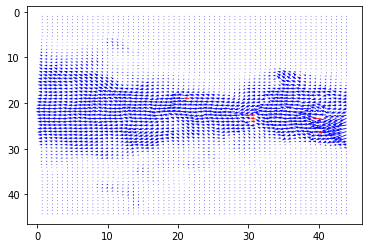

Image Pair 1
Processing image number:044


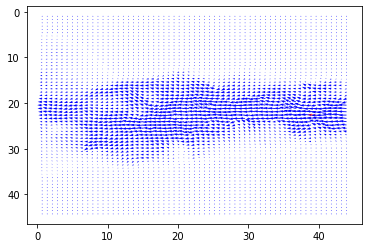

Image Pair 1
Processing image number:045


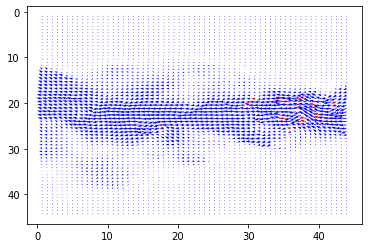

Image Pair 1
Processing image number:046


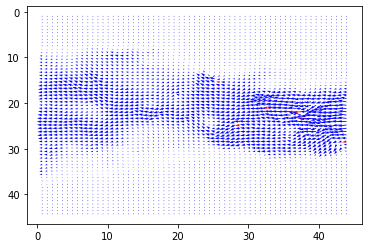

Image Pair 1
Processing image number:047


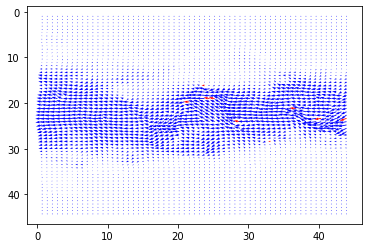

Image Pair 1
Processing image number:048


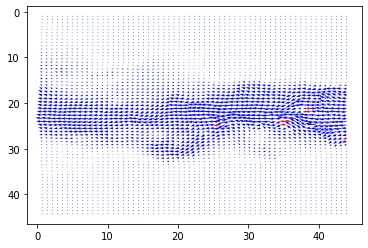

Image Pair 1
Processing image number:049


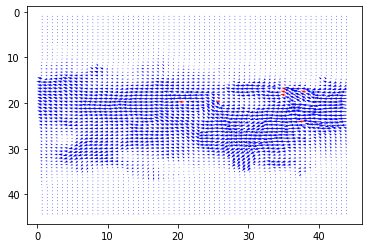

Image Pair 1
Processing image number:050


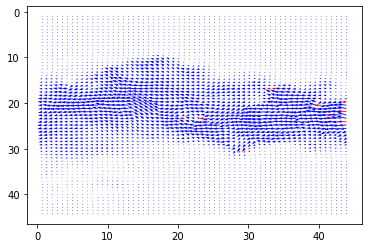

Image Pair 1
Processing image number:051


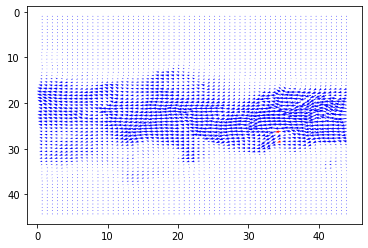

Image Pair 1
Processing image number:052


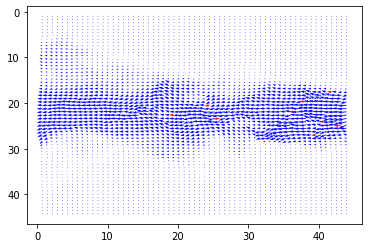

Image Pair 1
Processing image number:053


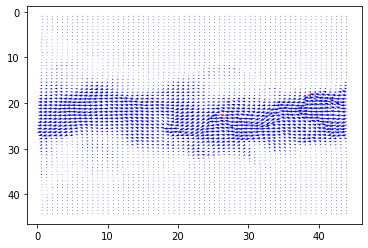

Image Pair 1
Processing image number:054


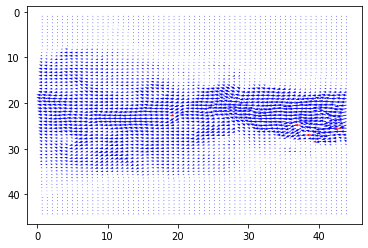

Image Pair 1
Processing image number:055


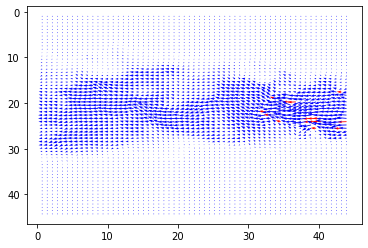

Image Pair 1
Processing image number:056


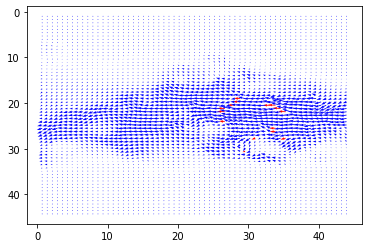

Image Pair 1
Processing image number:057


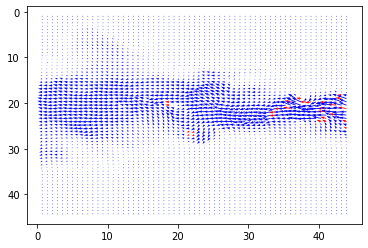

Image Pair 1
Processing image number:058


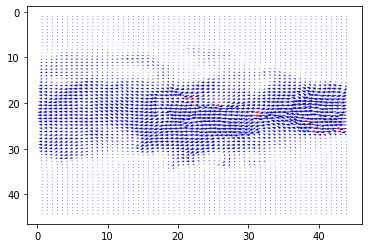

Image Pair 1
Processing image number:059


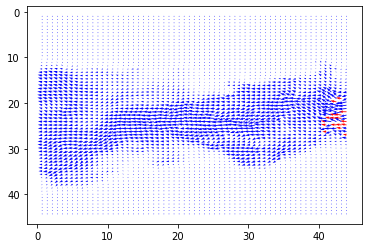

Image Pair 1
Processing image number:060


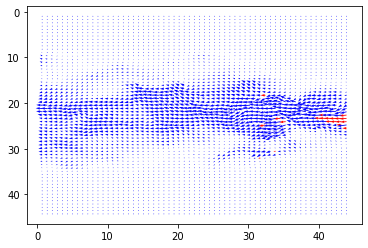

Image Pair 1
Processing image number:061


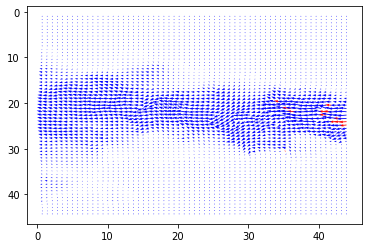

Image Pair 1
Processing image number:062


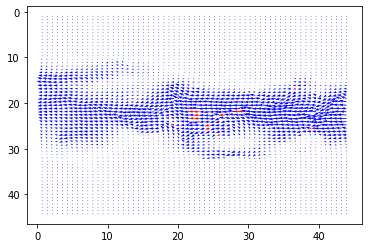

Image Pair 1
Processing image number:063


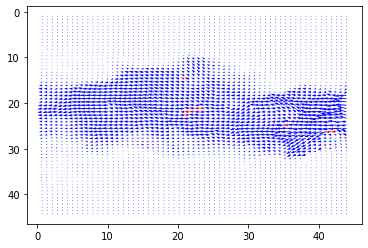

Image Pair 1
Processing image number:064


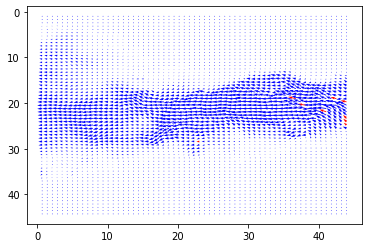

Image Pair 1
Processing image number:065


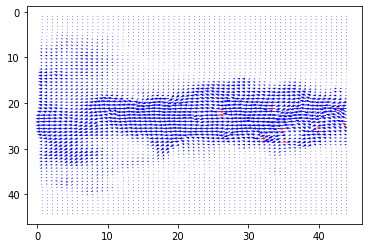

Image Pair 1
Processing image number:066


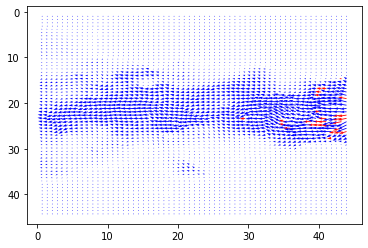

Image Pair 1
Processing image number:067


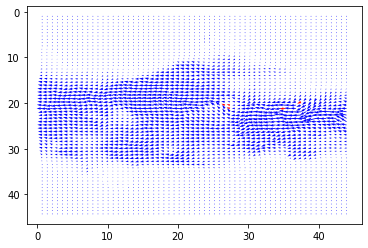

Image Pair 1
Processing image number:068


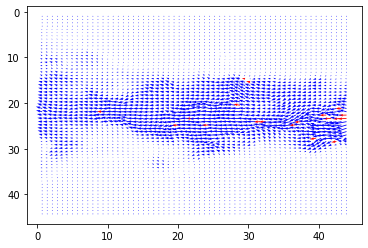

Image Pair 1
Processing image number:069


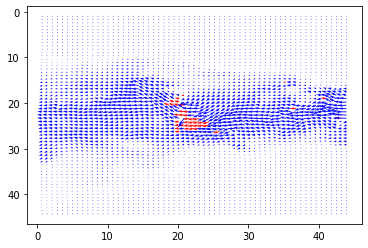

Image Pair 1
Processing image number:070


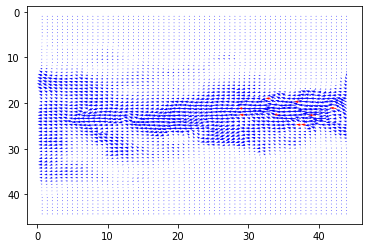

Image Pair 1
Processing image number:071


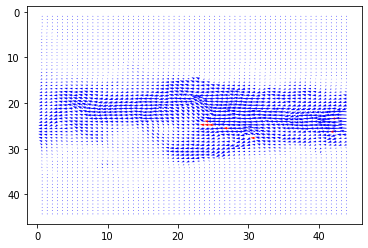

Image Pair 1
Processing image number:072


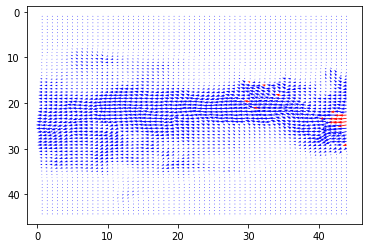

Image Pair 1
Processing image number:073


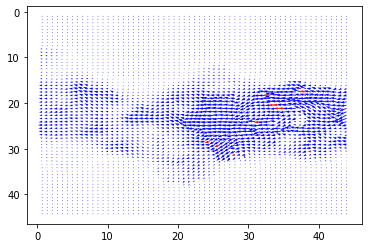

Image Pair 1
Processing image number:074


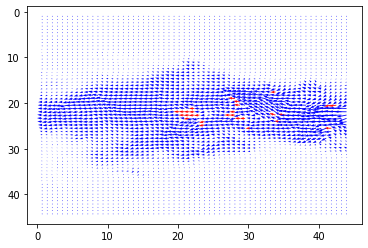

Image Pair 1
Processing image number:075


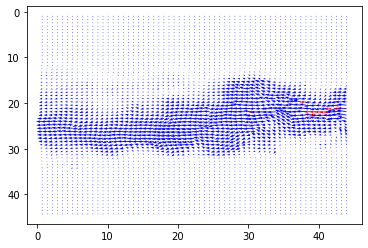

Image Pair 1
Processing image number:076


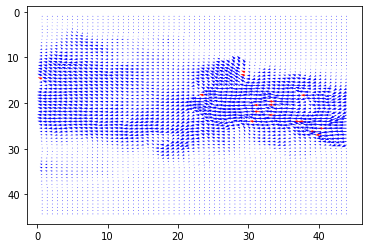

Image Pair 1
Processing image number:077


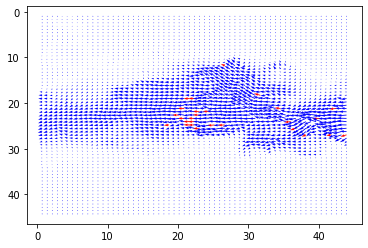

Image Pair 1
Processing image number:078


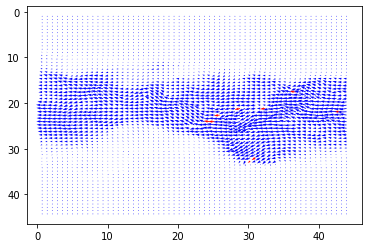

Image Pair 1
Processing image number:079


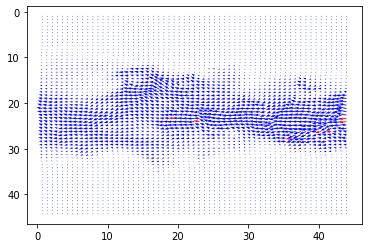

Image Pair 1
Processing image number:080


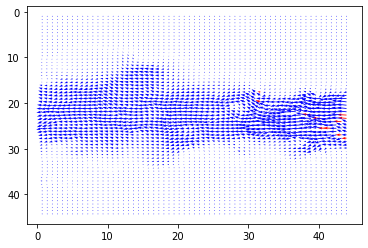

Image Pair 1
Processing image number:081


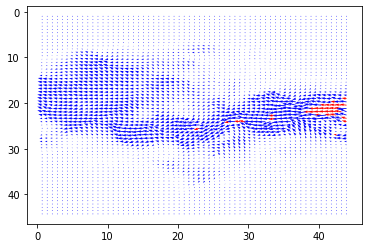

Image Pair 1
Processing image number:082


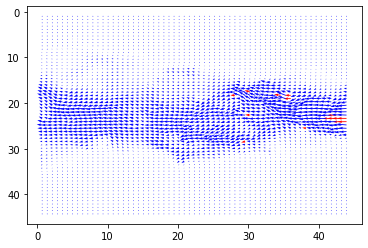

Image Pair 1
Processing image number:083


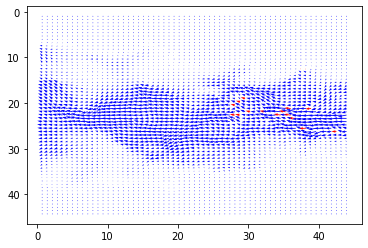

Image Pair 1
Processing image number:084


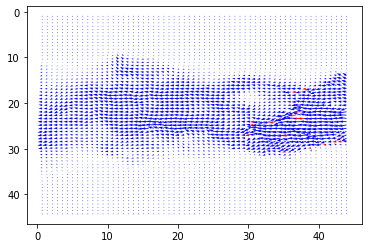

Image Pair 1
Processing image number:085


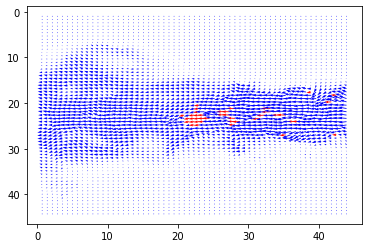

Image Pair 1
Processing image number:086


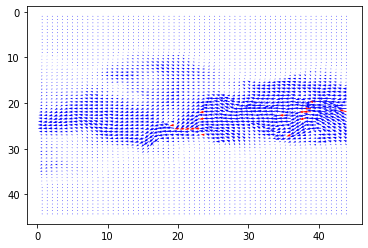

Image Pair 1
Processing image number:087


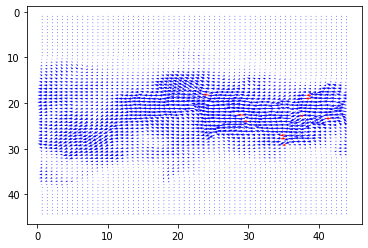

Image Pair 1
Processing image number:088


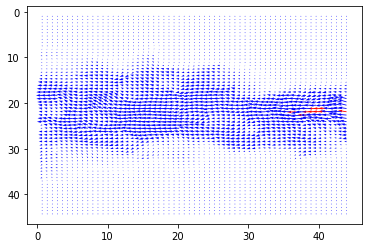

Image Pair 1
Processing image number:089


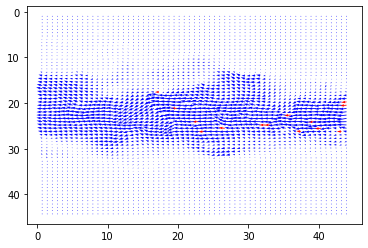

Image Pair 1
Processing image number:090


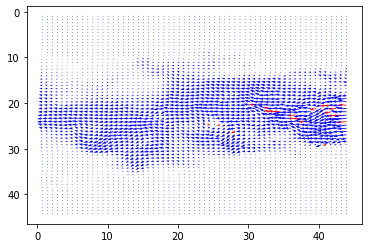

Image Pair 1
Processing image number:091


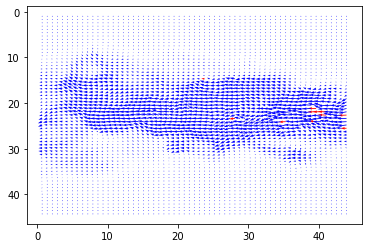

Image Pair 1
Processing image number:092


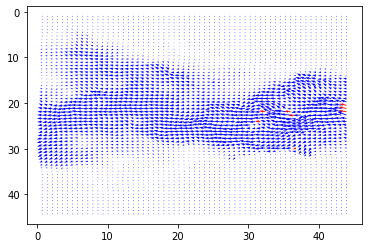

Image Pair 1
Processing image number:093


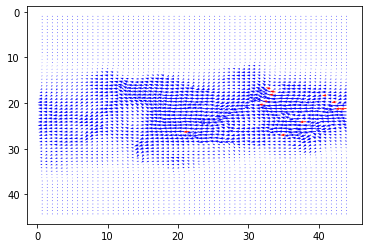

Image Pair 1
Processing image number:094


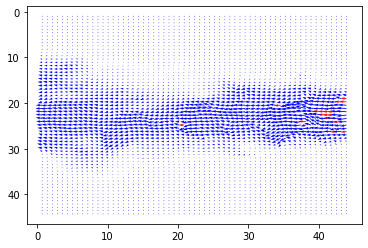

Image Pair 1
Processing image number:095


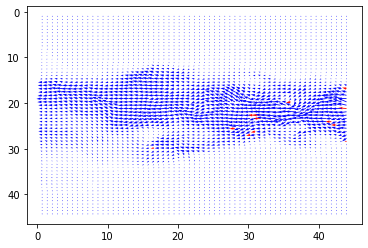

Image Pair 1
Processing image number:096


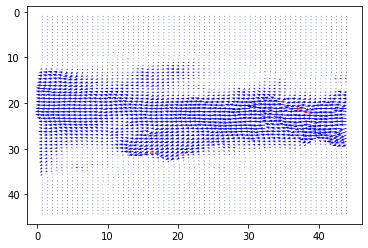

Image Pair 1
Processing image number:097


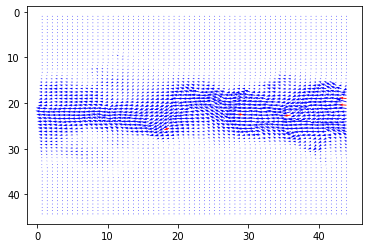

Image Pair 1
Processing image number:098


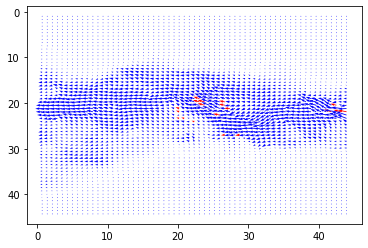

Image Pair 1
Processing image number:099


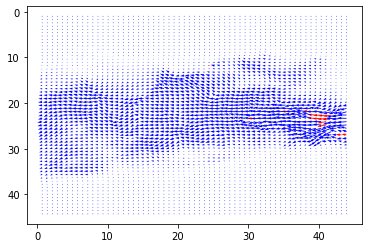

Image Pair 1
Processing image number:100


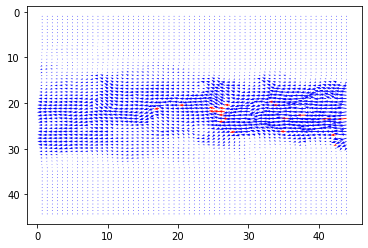

Image Pair 1


In [8]:
# Save vector field for all the images
for i in numbers:
    win_def_image(i,windowsizes,overlap,starting_folder)
    Data = np.genfromtxt(folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/exp1_' + i + '.txt',
        delimiter='	',
        names=True,
        dtype=None)
    uv = Data['u']
    vv = Data['v']
    uv = uv.flatten()
    vv = vv.flatten()
    u = np.c_[u,uv]
    v = np.c_[v,vv]

In [9]:
# Save vector field for all the images
#for i in range(0,98):
#win_def_image_moretime(numbers[i],numbers[i+1],windowsizes,overlap,starting_folder)
#    Data = np.genfromtxt(folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/exp1_' + i + '.txt',
#        delimiter='	',
#        names=True,
#        dtype=None)
#    uv = Data['u']
#    vv = Data['v']
#    uv = uv.flatten()
#    vv = vv.flatten()
#    u = np.c_[u,uv]
#    v = np.c_[v,vv]

In [10]:
frame_a  = tools.imread( folder + '/Images/A001a.tif' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                         search_area_size=min_win, 
                                         overlap=min_ovlap)
x = x/scaling_factor
y = y/scaling_factor

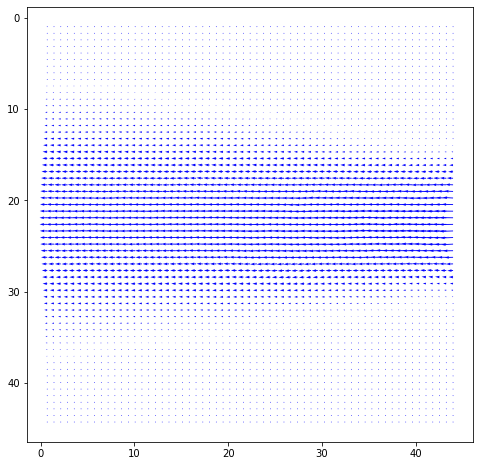

In [11]:
# Calculate the mean velocity
umean, vmean = np.mean(u,axis=1), np.mean(v,axis=1)
umean, vmean = umean.reshape(x.shape), vmean.reshape(x.shape)

# Initialize mask and snr fields
mask = np.zeros(x.shape, dtype=bool)
snr = np.zeros(x.shape)

#save in the simple ASCII table format
tools.save(x, y, umean, vmean, snr, mask, folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'meanField2.txt' )

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'meanField2.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 8000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

In [12]:
Data = np.genfromtxt(folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/meanField2.txt',
        delimiter='	',
        names=True,
        dtype=None)

In [50]:
# The two-dimensional domain of the fit.
X, Y = Data['x'], Data['y']


# The function to be fit is u [n x m]
u_mean = Data['u']
v_mean = Data['v']

# The mathematical approximation function is U:
def U(x, y, A, B):
  return (A/(x)) * np.exp(-((y)**2)/((B*(x))**2))
# return (A/(x-x0)) * np.exp(-(y-y0)**2/(B*(x-x0)))


# This is the callable that is passed to curve_fit.M is a (2,N) array
# where N is the total number of data points in Z, which will be ravelled
# to one dimension.
def func(M, *args):
  xx, yy = M
  arr = np.zeros(xx.shape)
  arr += U(xx, yy, *args)
  return arr

# origin of the nozzle
x0 = 45/2 + 80  # 45/2 sarebbe il centro della finestra + 80mm distanza dall'ugello [ref PIV challenge]
y0 = 45/2       # CHECK!!!!!!!!!!!!!!!!!

In [51]:
max(u_mean)*scaling_factor

98.00138222222222

In [52]:
# Initial guess of the parameters
u_max = max(u_mean)
max_index = np.where(u_mean == u_max)

A0 = 1
B0 = 1
p0 = [A0, B0]


In [53]:
Y

array([ 0.9694,  0.9694,  0.9694, ..., 44.256 , 44.256 , 44.256 ])

In [57]:
# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
coord = np.vstack((X - x0, Y - y0))

# LEAST SQUARES
p_opt, p_cov = curve_fit(func, coord, u_mean, p0)
# delta = 1000
 #while delta > 70:
 #   p_opt, p_cov = curve_fit(func, coord, u_mean, p_opt)
  #  delta = abs(p_opt[0] - p0[0])

print('Fitted parameters:')
print(p_opt)
print()
print(-6094/p_opt[0])
print()
print(-0.1313/p_opt[1])

Fitted parameters:
[ 4059.52145129 39734.92628982]

-1.5011621623698057

-3.3043977241163856e-06


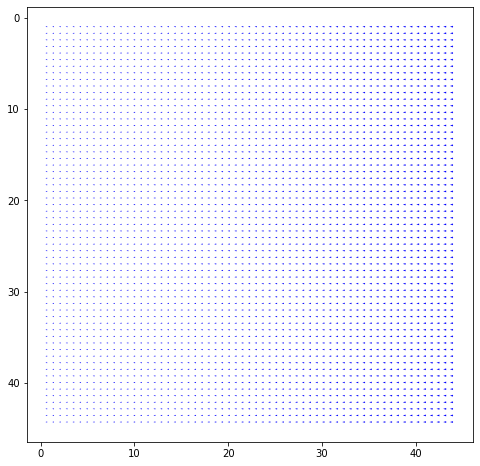

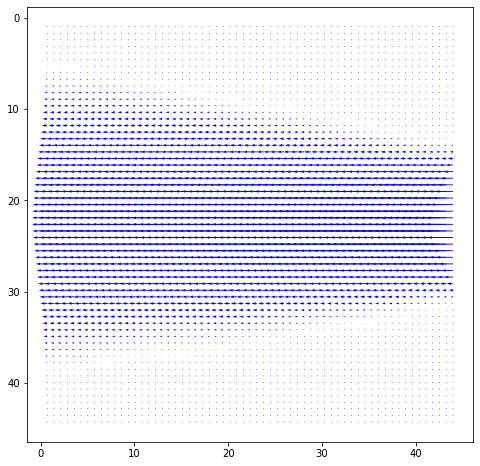

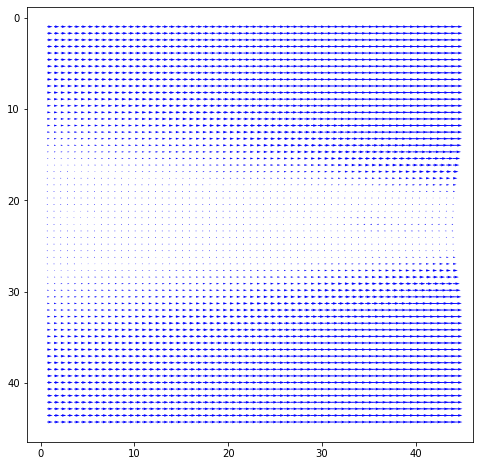

In [66]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel




#save in the simple ASCII table format
vmean = np.zeros(X.shape)
mask = np.zeros(X.shape, dtype=bool)
snr = np.zeros(X.shape)
U_mean = func(coord, p_opt[0], p_opt[1])
tools.save(X, Y, U_mean, vmean, snr, mask, folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_th.txt' )
tools.save(X, Y, u_mean, vmean, snr, mask, folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_exp.txt' )

tools.save(X, Y, u_mean-3*U_mean, vmean, snr, mask, folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_diff.txt' )


fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_th.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 10000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_exp.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 4000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/win_def/Open_PIV_results_' + str(min_win) + '_Test_1/' + 'testLS_diff.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 10000, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');

In [20]:
#fit = np.zeros(Z.shape)
#fit +=  U(X, Y, x0, y0, p_opt[0], p_opt[1])
rms = np.sqrt(np.mean((u_mean - U_mean)**2))
print('RMS residual =', rms)

RMS residual = 55.623602791908006


In [34]:
print(u_mean)

[-0.103  -0.1394 -0.4006 ...  1.3833  1.0373  0.9886]


In [35]:
print(U_mean)

[-2.97771108 -2.88954395 -2.80186337 ... -0.03264151 -0.02739979
 -0.02284298]


In [21]:
# mean centerline  velocity
# A == p_opt[0]
def U_centerline(x, x0, A):
  return A/(x-x0) 

# mean jet width
# B == p_opt[1]
def jet_width(x, x0, B):
  return (x-x0)*B

# reduced radial coordinate
def similarity_variable(y, y0, *args):
  width = args
  return (y-y0)/width

In [22]:
# My field 
x1 = X[0]
y1 = Y[0]
n = np.sum(X==x1)
m = np.sum(Y==y1)

print(n) # intervalli in y
print(m) # intervalli in x

61
61


In [23]:
X_1 = X.reshape(n,m)

Y_1 = Y.reshape(n,m)

U_1 = u_mean.reshape(n,m)

V_1 = v_mean.reshape(n,m)


x = 43.9855 mm
x = 22.3422 mm
x = 1.4203 mm


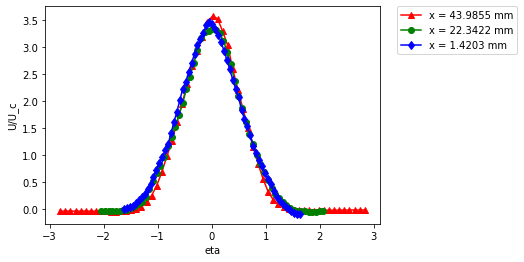

In [24]:
# Plot axial velocity on the similarity variable and adimensionalized by U_c 
m1 = m - 1
x_1 = X_1[0,m1]
print('x =', x_1, 'mm')
y_1 = Y_1[:,0]
u_1 = U_1[:,m1]

m2 = m//2
x_2 = X_1[0,m2]
print('x =', x_2, 'mm')
y_2 = Y_1[:,0]
u_2 = U_1[:,m2]

m3 = 1
x_3 = X_1[0,m3]
print('x =', x_3, 'mm')
y_3 = Y_1[:,0]
u_3 = U_1[:,m3]

U_c = U_centerline(X_1[0,:], x0, p_opt[0])
Width = jet_width(X_1[0,:], x0, p_opt[1])

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -u_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -u_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -u_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()



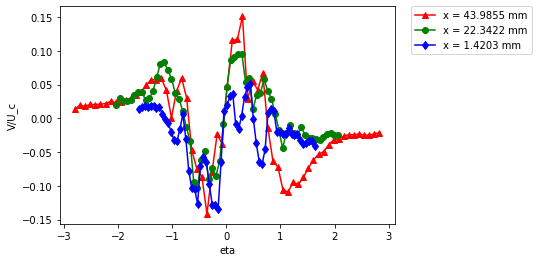

In [25]:
# Plot radial velocity on the similarity variable and adimensionalized by U_c

v_1 = V_1[:,m1]
v_2 = V_1[:,m2]
v_3 = V_1[:,m3]

eta_1 = similarity_variable(Y_1[:,0], y0, Width[m1])
eta_2 = similarity_variable(Y_1[:,0], y0, Width[m2])
eta_3 = similarity_variable(Y_1[:,0], y0, Width[m3])

plt.plot(eta_1, -v_1/U_c[m1], 'r-^', label='x = %.4f mm' %x_1)
plt.plot(eta_2, -v_2/U_c[m2], 'g-o', label='x = %.4f mm' %x_2)
plt.plot(eta_3, -v_3/U_c[m3], 'b-d', label='x = %.4f mm' %x_3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('V/U_c')
plt.show()

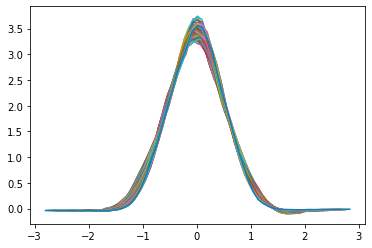

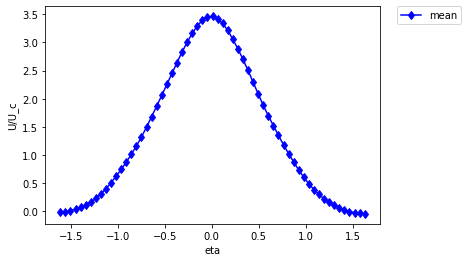

In [26]:
# Mean of the similarity profile on the single eta
ETA = np.zeros((n, m))
U_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        ETA[i, j] = similarity_variable(Y_1[i,0], y0, Width[j])
        U_normalized[i, j] = U_1[i, j]/U_c[j]
plt.plot(ETA, -U_normalized)
plt.show()

Unorm_mean = np.zeros(n)
ETA0 = ETA[:,0]
U_x = np.zeros((n, m))
U_x[:,0] = U_normalized[:,0]
for s in range(m-1):
    U_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], U_normalized[:, s+1])
    
for t in range(n):
    Unorm_mean[t] = np.mean(U_x[t,:])
    
plt.plot(ETA0, -Unorm_mean, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('U/U_c')
plt.show()


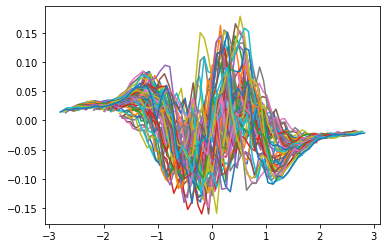

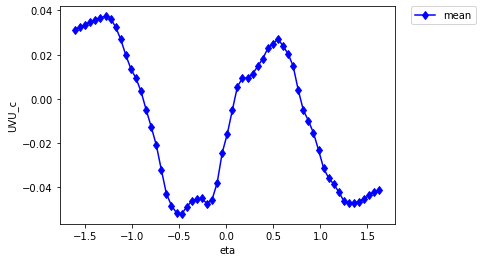

In [27]:
# Mean of the similarity profile on the single eta
V_normalized = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        V_normalized[i, j] = V_1[i, j]/U_c[j]
plt.plot(ETA, -V_normalized)
plt.show()

Vnorm_mean = np.zeros(n)
V_x = np.zeros((n, m))
V_x[:,0] = V_normalized[:,0]
for s in range(m-1):
    V_x[:,s+1] = np.interp(ETA0, ETA[:, s+1], V_normalized[:, s+1])
    
for t in range(n):
    Vnorm_mean[t] = np.mean(V_x[t,:])
    
plt.plot(ETA0, -Vnorm_mean, 'b-d', label='mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('eta')
plt.ylabel('UVU_c')
plt.show()